In [2]:
import keras

Using TensorFlow backend.


In [3]:
from __future__ import print_function
from keras.datasets import mnist
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

Exibindo alguns dígitos...

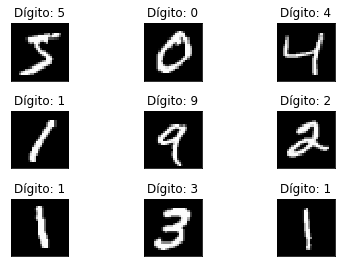

In [9]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title('Dígito: {}'.format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [10]:
batch_size = 128
num_classes = 10
epochs = 12

In [11]:
# dimensoes dos dados de input
img_rows, img_cols = 28, 28

### Preparação dos dados

Preparando os dados, com alteração de tamanhos, normalização de valores de pixel, etc.

In [12]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train shape: ', X_train.shape)
print(X_train.shape[0], ' amostras de treino')
print(X_test.shape[0], ' amostras de teste')

X_train shape:  (60000, 28, 28, 1)
60000  amostras de treino
10000  amostras de teste


Conversão dos vetores de classe para matrizes de classes binárias

In [13]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Construção do modelo


É necessário definir:

- função de otimização

- função de perda

- métrica de performance

- gráficos de performance (checar se houve overfitting)

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [ ]:
history = model.fit(X_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 117s 2ms/step - loss: 0.2610 - accuracy: 0.9194 - val_loss: 0.0630 - val_accuracy: 0.9807
Epoch 2/12
32256/60000 [===============>..............] - ETA: 52s - loss: 0.0900 - accuracy: 0.9731

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epocas = range(len(acc))

plt.plot(epocas, acc, 'bo', label=' Acc Treino')
plt.plot(epocas, val_acc, 'b', label='Acc Validação')
plt.plot('Acurácia de Treinamento e Validação')
plt.legend()

plt.figure()

plt.plot(epocas, loss, 'bo', label='Loss Treino')
plt.plot(epocas, val_loss, 'b', label='Loss Validação')
plt.title('Perda de Treinamento e Validação')
plt.legend()

plt.show()